# Домашнее задание 1 по курсу Базовая Биоинформатика
**Макаров Владислав Денисович, Б06-107**
<br><br>
Прислать **до 6 ноября 12:00 включительно** на почту 	**olga.kudryashova179@gmail.com**
<br>
**В теме письма** обязательно указать "МФТИ домашнее задание *ФАША_ФАМИЛИЯ_ИМЯ*"
<br>
В самом ноутбуке также обязательно указать Фамилия Имя и группу.

<br><br>
**Можно все задания выполнить в ноутбуке**. Если удобнее - часть можно выполнить в любом текстовом редакторе и **прислать в виде ПДФ**.


# BLAST строк

В первой части необходимо освоить пакет и научиться бластить строки через питон.

## Вводное

In [1]:
!pip install Bio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 279.4/279.4 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 17.4 MB/s eta 0:00:00


In [2]:
from Bio import SeqIO

from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord

In [3]:
from Bio import pairwise2
alignments = pairwise2.align.globalxx("ATCTCCTA", "AATCTCTGAA")

/usr/local/lib/python3.10/dist-packages/Bio/pairwise2.py:278: BiopythonDeprecationWarning: Bio.pairwise2 has been deprecated, and we intend to remove it in a future release of Biopython. As an alternative, please consider using Bio.Align.PairwiseAligner as a replacement, and contact the Biopython developers if you still need the Bio.pairwise2 module.
  warnings.warn(


In [4]:
alignments

[Alignment(seqA='A-TCTCCT-A-', seqB='AATCT-CTGAA', score=7.0, start=0, end=11),
 Alignment(seqA='-ATCTCCT-A-', seqB='AATCT-CTGAA', score=7.0, start=0, end=11),
 Alignment(seqA='A-TCTCCT-A-', seqB='AATCTC-TGAA', score=7.0, start=0, end=11),
 Alignment(seqA='-ATCTCCT-A-', seqB='AATCTC-TGAA', score=7.0, start=0, end=11),
 Alignment(seqA='A-TCTCCT--A', seqB='AATCT-CTGAA', score=7.0, start=0, end=11),
 Alignment(seqA='-ATCTCCT--A', seqB='AATCT-CTGAA', score=7.0, start=0, end=11),
 Alignment(seqA='A-TCTCCT--A', seqB='AATCTC-TGAA', score=7.0, start=0, end=11),
 Alignment(seqA='-ATCTCCT--A', seqB='AATCTC-TGAA', score=7.0, start=0, end=11)]

In [5]:
from Bio.pairwise2 import format_alignment

print(format_alignment(*alignments[0]))

A-TCTCCT-A-
| ||| || | 
AATCT-CTGAA
  Score=7



In [6]:
#научиться создавать объект SeqRecord

prot1 = SeqRecord(
    Seq("HLNPAVTLGLLLCQISIFRALMYIAQCVGAIVAVLRVKVWTSGQVEEYDLADDINSRVEMKPK"),
    id="P1111",
    name="Name1",
    description="My description",
)

print(prot1)

ID: P1111
Name: Name1
Description: My description
Number of features: 0
Seq('HLNPAVTLGLLLCQISIFRALMYIAQCVGAIVAVLRVKVWTSGQVEEYDLADDI...KPK')


In [7]:
#научиться создавать объект SeqRecord

prot2 = SeqRecord(
    Seq("HLQVAQCVGAIVAVLINVNVEKPKHLFAINYTGASMNPARSFGPAVIMGNWENHWI"),
    id="P2222",
    name="Name2",
    description="My description 2",
)

print(prot2)

ID: P2222
Name: Name2
Description: My description 2
Number of features: 0
Seq('HLQVAQCVGAIVAVLINVNVEKPKHLFAINYTGASMNPARSFGPAVIMGNWENHWI')


## Задание 0

Изучите в пакете Bio - как провести сравнение по матрице BLOSUM62 <br>
подсказка - вам поможет substitution_matrices.load()

Проведите сравнение двух созданных выше строк (prot1, prot2), считая расстояние по матрице BLOSUM62

In [9]:
from Bio.Align import substitution_matrices
blosum62 = substitution_matrices.load('BLOSUM62')
dist = pairwise2.align.globaldx(prot1.seq, prot2.seq, blosum62)
print(format_alignment(*dist[0]))

HLNPAVTLGLLLCQISIFRALMYIAQCVGAIVAVLRVK-VWTSGQVEE--YDL-ADDIN----SRVEM---K---P-------K----
|          | |         .||||||||||| .  |  .  ||.  . | |  ||    |   |   .   |       .    
H----------L-Q---------VAQCVGAIVAVL-I-NV--N--VEKPKH-LFA--INYTGAS---MNPARSFGPAVIMGNWENHWI
  Score=129



##Задание 1

Проверьте себя - решите задание из контрольной:


Найдите расстояние между строками: AGTCGGA и TATGCTAC <br> Визуализируйте один вариант выраванивания (любой)

In [10]:
from Bio import pairwise2
from Bio.pairwise2 import format_alignment

In [11]:
seq1 = "AGTCGGA"
seq2 = "TATGCTAC"

In [12]:
alignments = pairwise2.align.globalxx(seq1, seq2)

In [13]:
alignment = alignments[0]  # Выберите любой вариант
print(format_alignment(*alignment))

-AGTCGG--A-
 | |  |  | 
TA-T--GCTAC
  Score=4



## Задание 2

Проведите сравнение между двумя белками: BCL2 и BCL6
Загрузите их аминокислотные последовательности (uniprot) и проведите выравнивание. Укажите чему получилось равно расстояние и привидите любой вариант выравнивания (один!)

Вставьте скриншот откуда вы взяли последовательность белков:

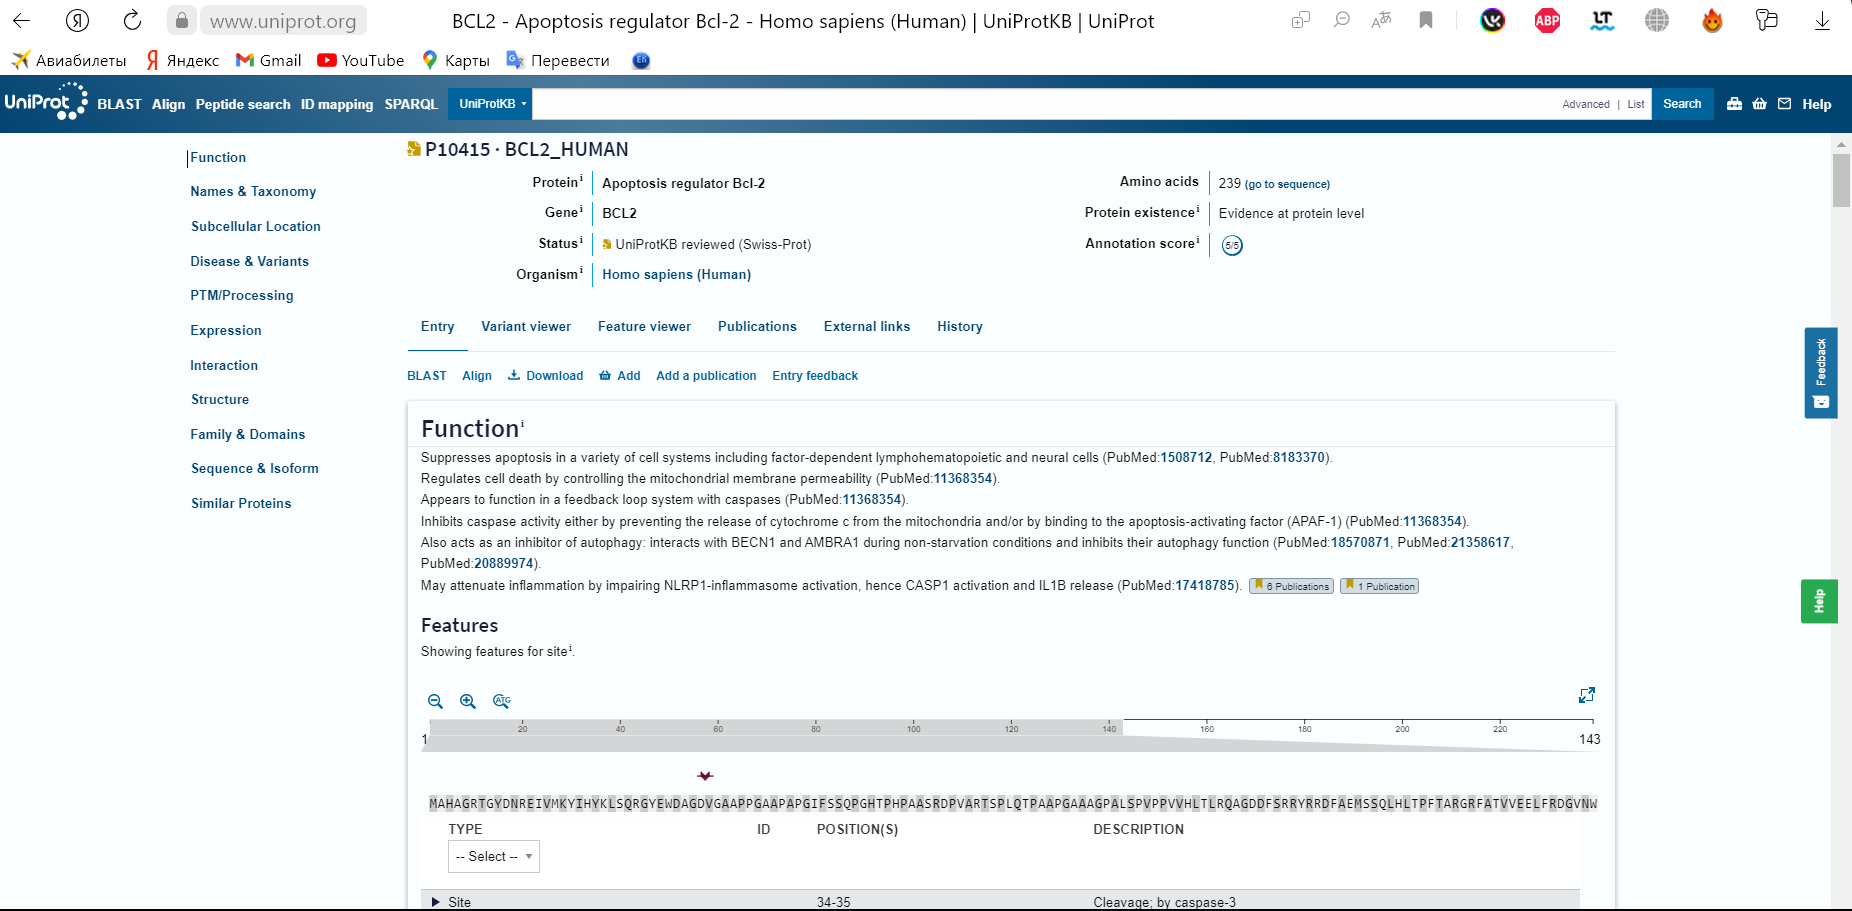

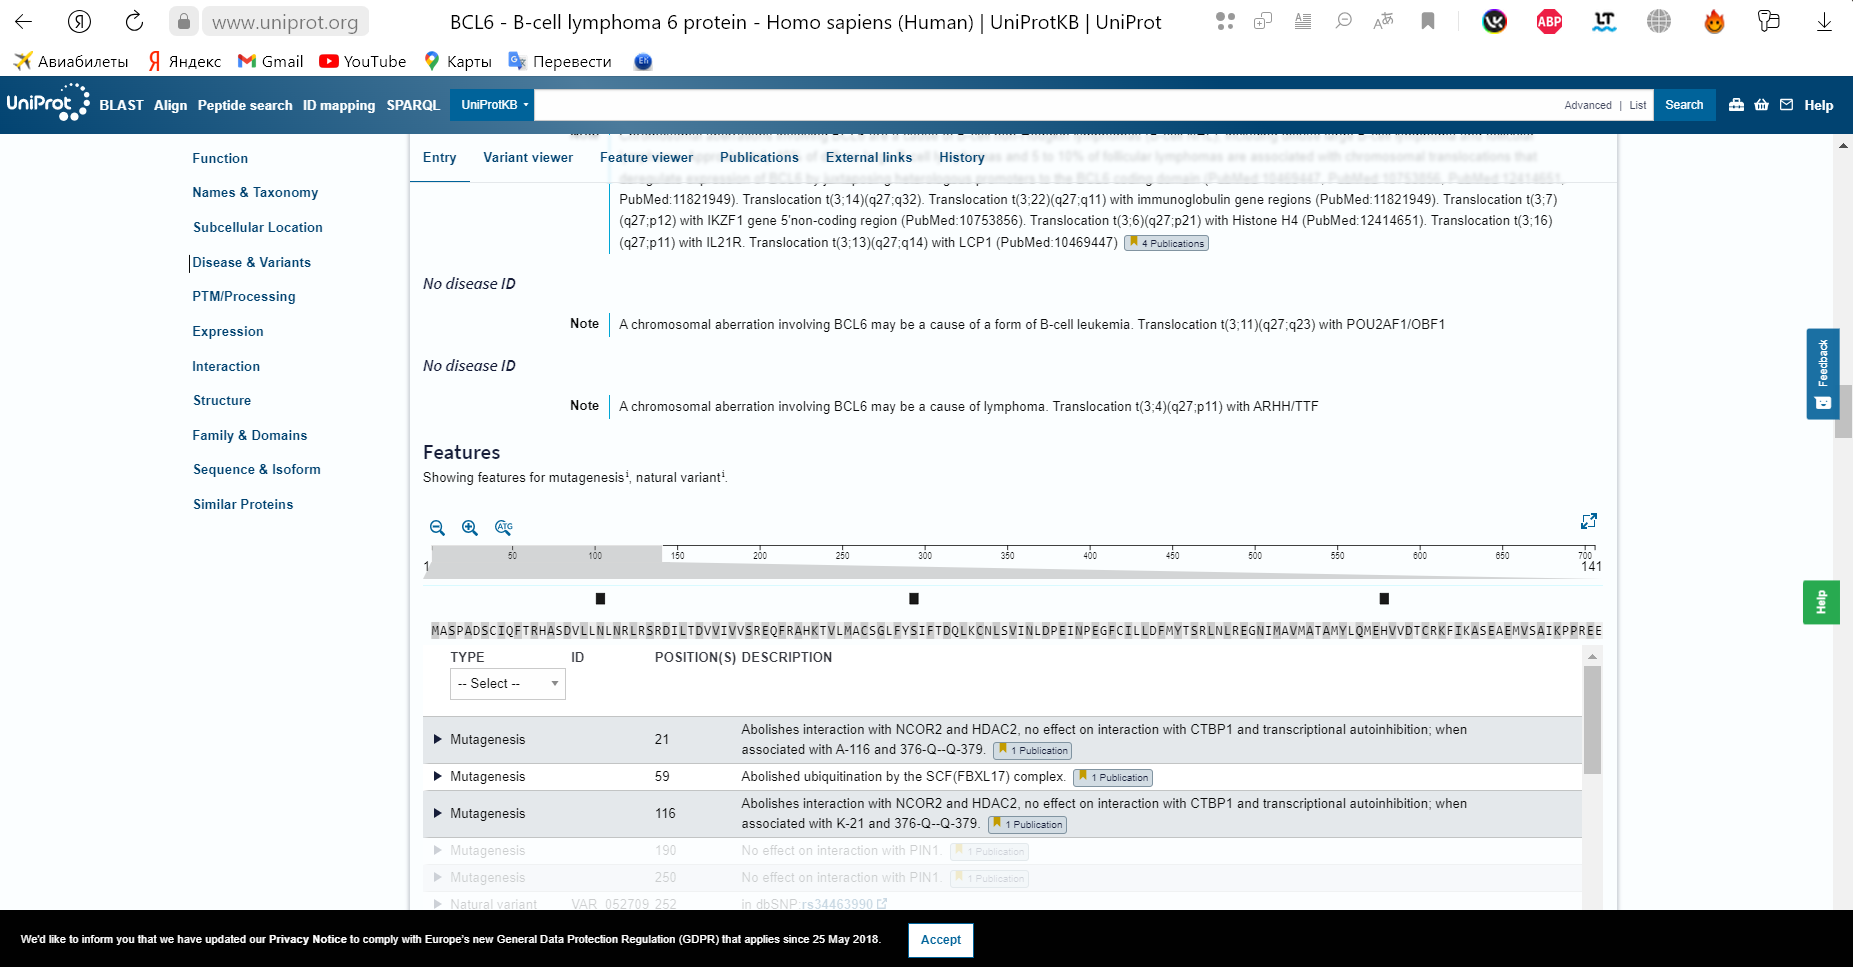


In [14]:
BCL2 = 'MAQAGRTGYDNREIVMKYIHYKLSQRGYEWDVGDVDAAPLGAAPTPGIFSFQPESNPTPAVHRDMAARTSPLRPIVATTGPTLSPVPPVVHLTLRRAGDDFSRRYRRDFAEMSSQLHLTPFTARGRFATVVEELFRDGVNWGRIVAFFEFGGVMCVESVNREMSPLVDNIALWMTEYLNRHLHTWIQDNGGWDAFVELYGPSVRPLFDFSWLSLKTLLSLALVGACITLGTYLGHK'
BCL6 = 'MASPADSCIQFTRHASDVLLNLNRLRSRDILTDVVIVVSREQFRAHKTVLMACSGLFYSIFTDQLKCNLNVINLDPEINPEGFCILLDFMYTSRLNLREGNIMAVMATAMYLQMEHVVDTCRKFIKASEAEMVPALKPPREEFLNSRMLMPHDIMGYRGREVVENNLPLRNTPGCESRAFAPSLYSGLSTPPASYPMYSHLPLSSFLFADEEPRDAHARMPVANPFPKERTLSCDSARPVPSEYSRPAMEVSLSLCHSNIYLPKEAVPEDTRSDMHFSVTEGPKPAAPSARNAPYFPCDKASKEERPSSEDEIALHFEPPNAPLNRKGLVSPQSPQKSDCQPNSPTESCSSKNACILQASGSPPAKSPTDPKACNWKKYKFIVLNSLNQNAKPEGSEQTELGRLSPRAYPVQPAGQPPLEPDNLGLQIPTKLSASGEDSTIPQASRLNNIVNRSLTGSPRSSSESHSPLYMHPPKCTSCDSQSPQHTEMCLHTAGPTFPEEMGETQSEYSDSSCENGAFFCNECDCRFSEEASLKRHTLQTHSDKPYKCDRCQASFRYKGNLASHKTVHTGEKPYRCNICGAQFNRPANLKTHTRIHSGEKPYKCETCGARFVQVAHLRAHVLIHTGEKPYPCEICGTRFRHLQTLKSHLRIHTGEKPYHCEKCNLHFRHKSQLRLHLRQKHGAITNTKVQYRVSAADLPPELPKAC'

In [15]:
blosum62 = substitution_matrices.load('BLOSUM62')
dist = pairwise2.align.globaldx(BCL2, BCL6, blosum62)
print(format_alignment(*dist[0]))

MA-------Q----AG--------R-------T----------------------G--Y----D----N-------------------------R----E--I--VMK----YI---H-------Y-K---------L---------SQR--------GY---EWDV-----------GDV-D--A-AP-L--G-A---A--P--T--PGI--FS-F--Q-P-ES-------NP-----T-------P--------A--V-----H--------------R-DM----------AA---RTS-PL-----------RP-----I-V------ATT-----G---P-------------T----------L--S--PVP---P-------------VV-H-L-----------T-L-R---RA------G------D---------------DFS---R--RY------R------RDFA--E------M------S--SQL---H----L-T--P-FTAR----GRFA-TVVE-ELFR-DGV----NWGRIVAFF--EFGGVMCV-----E--SVN-RE--M---S--PLV---D----------NIALW----M-T-E--Y---L-----NR--HL--HTW-IQDN-G---------GWDA-FVE---L--Y-----G--PSVR-PLF-D-----F----SWL-S-LK--TL-----------L-----S-LA-L-V----GACITLG-T---Y------LGH-----K--
||       |    |         |       |                      |  |    |    |                         |    |  |  ||     |.   |       . |         |         | |        ||   |  |           |   .  | || |  | .   |  |  .  | .  |  |  . | ..  

# Задание по геномному браузеру и базам данных

**3. Расшифруйте, что за ген TNF: есть ли у него синонимы названий? Какие функции
данного гена известны?**


а) Ген TNF (Tumor Necrosis Factor) имеет следующие **синонимы названий:** DIF, TNF-ALPHA, TNFA, TNFSF2.

б) **Функции:**

**Воспаление:** TNF является центральным медиатором в воспалительных реакциях. Он участвует в начальной фазе воспаления, приводя к расширению сосудов и миграции белых кровяных клеток к месту воспаления.

**Апоптоз (программированная клеточная гибель):** TNF может индуцировать апоптоз в некоторых типах клеток, особенно в клетках опухоли.

**Иммунорегуляция:** TNF участвует в регуляции иммунной системы, в том числе в активации макрофагов и других клеток иммунной системы.

**Стимуляция продукции других цитокинов:** TNF способствует продукции других цитокинов, таких как интерлейкины, воспалительными клетками.

**Участие в регенерации тканей:** В некоторых случаях TNF может способствовать регенерации тканей и росту новых кровеносных сосудов.

**4. Определите, где в геноме человека находится данный ген (в сборке
GRCh38/hg38)?**

Ген TNF находится на хромосоме **6 (Chromosome 6)** в диапазоне координат с **31,575,565** до **31,578,336** на положительной (forward) цепи. Эти координаты относятся к сборке **GRCh38**.

**5А. Находясь в сборке генома человека GRCh38/hg38 в UCSC геномном браузере,
добавьте трек  "Cons 30 Primates Track Settings". Расположите данный трек наверхе, рядом с треком “Gencode V44" в формате pack.
Приложите скриншот.**


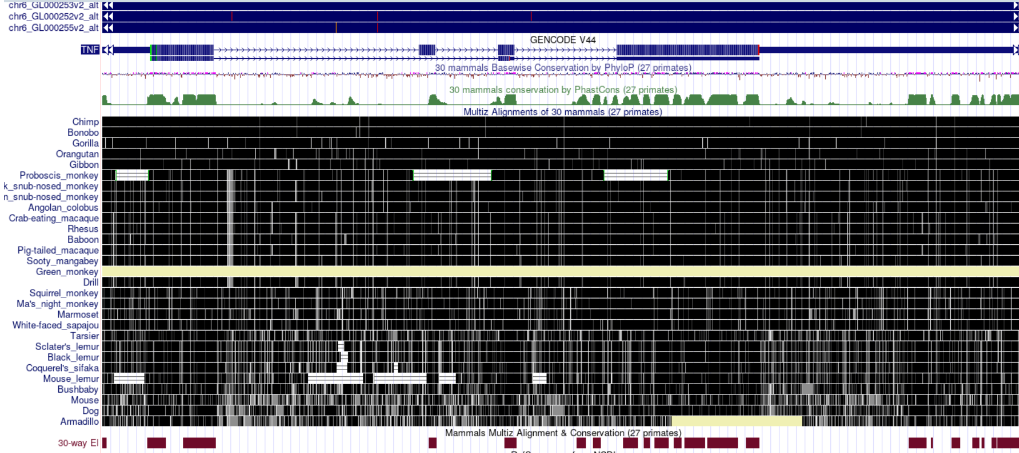

**5Б. Прочитайте про трек "Cons 30 Primates Track Settings". Объясните своими словами - какая информация в нем представлена?**

Трек "Cons 30 Primates Track Settings" вероятно содержит данные о консервативных участках в геноме приматов. Он позволяет видеть, насколько сильно участки генома приматов сохранились со временем и могут указывать на важные функциональные элементы.

**5В. В продолжение 5А,Б - посмотрите в каких экзонах генов TNF у каких приматов есть отличия? (перечислите минимум 3)**

1. Лемуры
2. Обезьяны
3. Дрилы

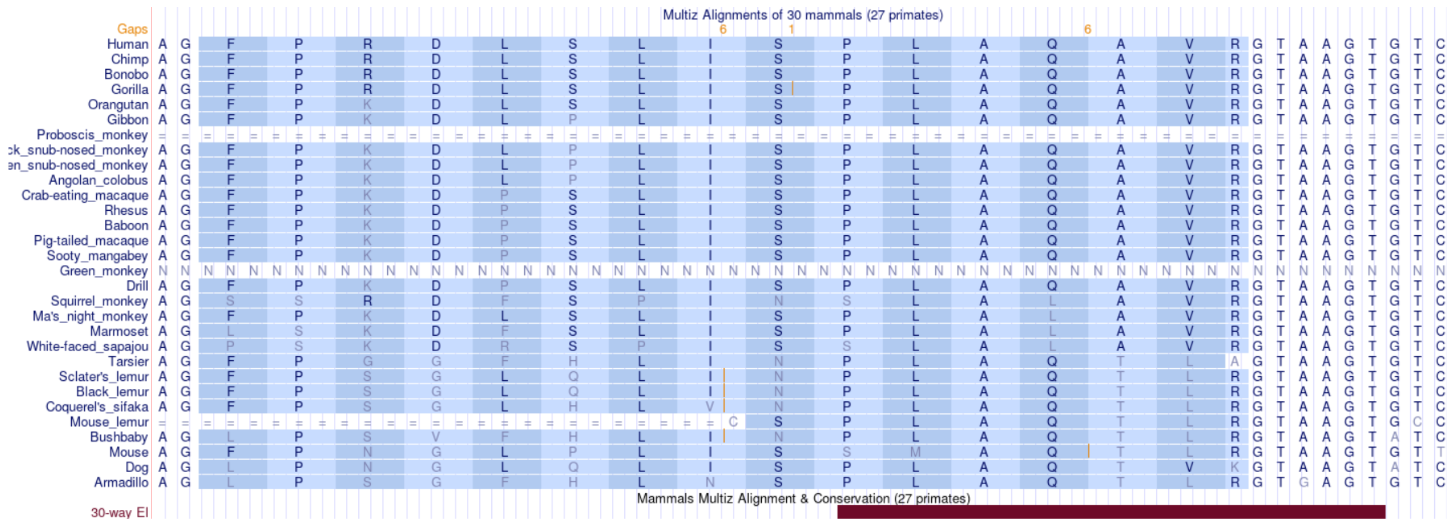

**5Г. Нажмите сверху “View” -> “PDF/PS”, чтобы загрузить к
себе pdf или ps картинку. Результаты приложите здесь:**

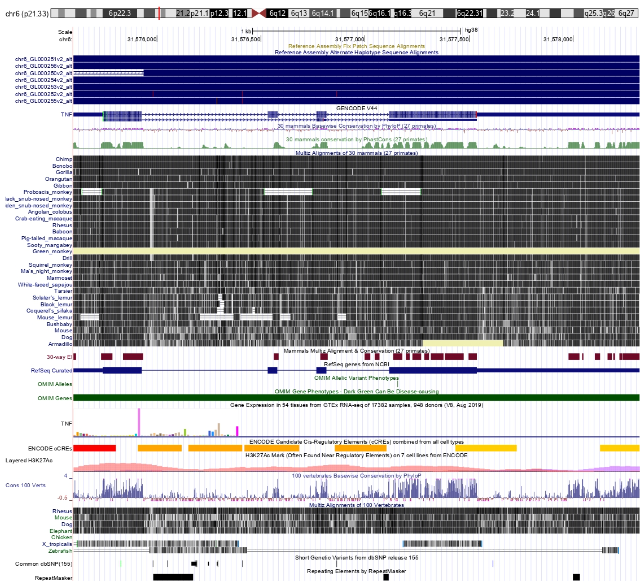

Откройте Ensembl
<br>
**6) Какому ген соответсвует ID ENSMUSG00000000303?**


Gene: Cdh1

**7) Опишите кратко что это за ген.**

Этот ген кодирует классический кадгерин суперсемейства кадгеринов. Альтернативный сплайсинг приводит к образованию множества вариантов транскрипта

**8) Определить сколько транскриптов имеет данный ген (согласно Ensemble)? ПОмимо ответа, также приложите скриншот**


Данный ген имеет 3 транскрипта.

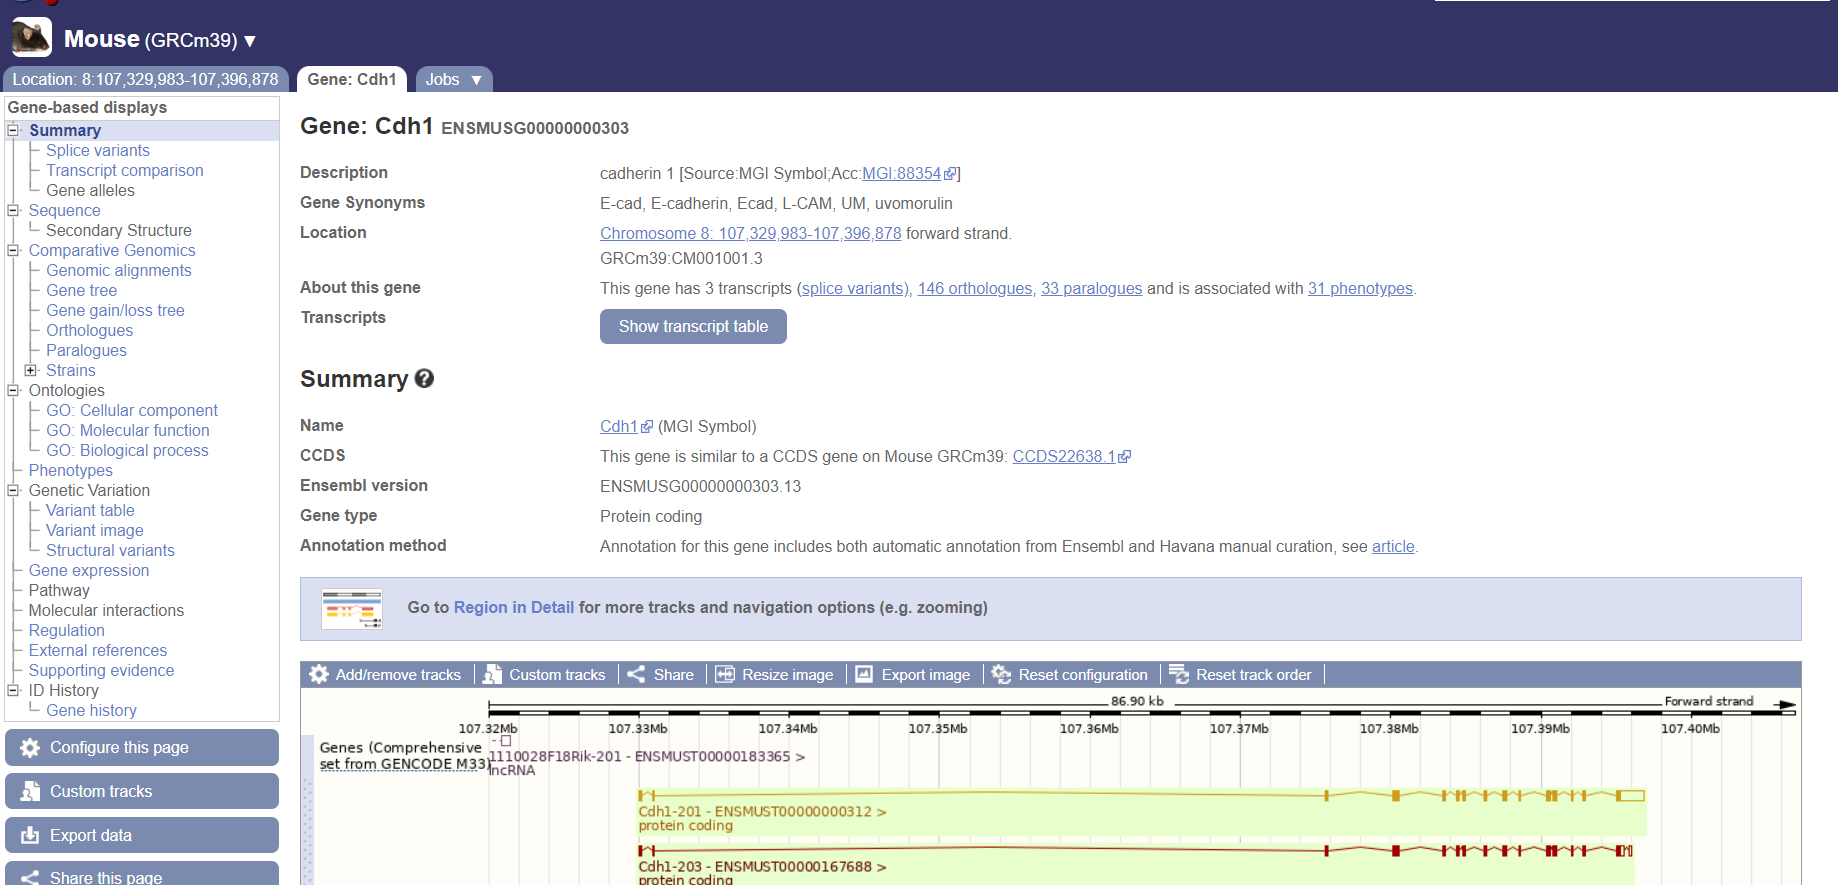

**9) Сколько из этих транскриптов кодирует белок? Чем отличаются эти транскрипты?**

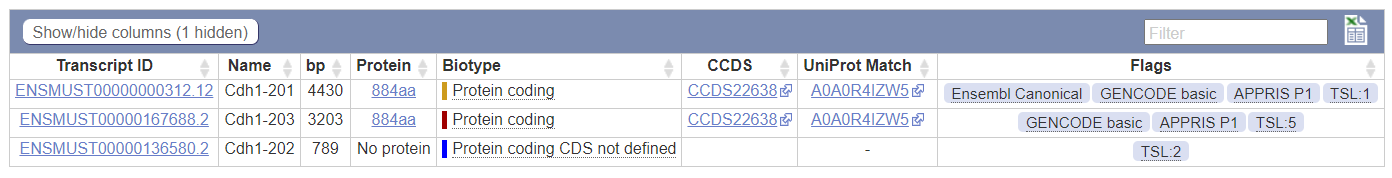

Как видно из скриншота - только 2 из транскриптов являются кодирующими.

**10) Какую длину имеет самый длинный транскрипт, кодирующий белок?**

4430 bp